In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enum

%matplotlib inline

In [3]:
pd.__version__

'0.25.2'

In [4]:
start = '2019-01-01'
end = '2019-12-31'
time_interval = 'H'
ind = pd.date_range(start, end, freq=time_interval)

In [5]:
def peaks_by_rules(date_index, ts_value,col_name,rule='day', rule_value=1):
    """This function is capable of generating timeseries with non-zero values 'ts_value' if the rule is fulfilled
    and zero values at any other time.
    Allowed rules:
    - any of the attributes of pd.DateIndex
    - offsets
    - last_n_day_of_month
    
    Here some help in order you forget how to use the rules:
    - pd.DateOffset(month=1) will be just the january    
    - more to come"""
    def last_n_day_of_month(time_stamp):
        return time_stamp == (time_stamp - pd.offsets.Day(1) + pd.offsets.MonthEnd()) - pd.offsets.Day(rule_value)
    
    if rule == 'last_n_day_of_month':
        assert 0 <= rule_value <= 31, f"rule_value out of range. Allowed values are between 0 and 31 but {rule_value} was given"
        values = np.where(pd.Series(date_index).apply(lambda x: last_n_day_of_month(x)), ts_value, 0) 
    elif hasattr(date_index, rule):
        values = np.where(getattr(date_index, rule) == rule_value, ts_value, 0)
    elif isinstance(rule_value, pd.DateOffset) and rule == 'offsets':
        values = np.where(date_index + rule_value == date_index, ts_value, 0)
    else:
        raise NotImplementedError(f'your rule is not implemented. Value:{rule_value}, rule: {rule}')
    df = pd.DataFrame(values, columns=[col_name], index=date_index)
    return df    

In [13]:
peaks_by_rules(ind, 2, 'alpha_du_opfer', 'offsets', rule_value=2).plot(figsize=(20, 10))

TypeError: hasattr(): attribute name must be string

In [165]:
arr = peaks_by_rules(ind, 1, 0, 'dayofweek', rule_value=1)

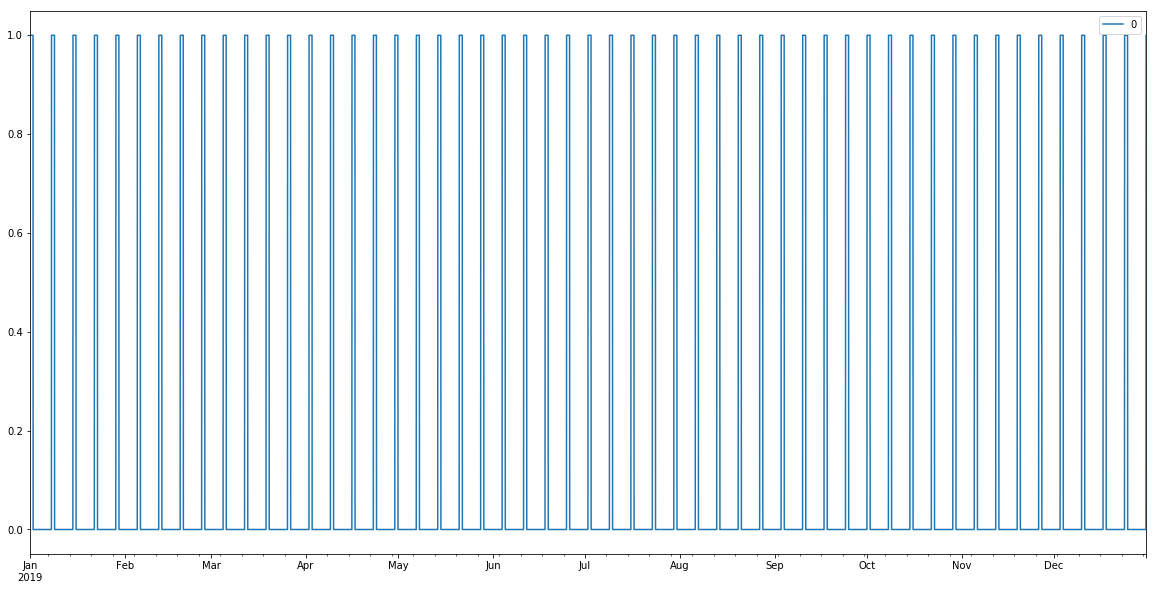

In [166]:
arr.plot(figsize=(20,10))